# **Instalando bibliotecas**

In [ ]:
pip install tensorflow matplotlib

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, datasets

In [5]:
print("TF version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.12.0
GPU is NOT AVAILABLE


# **Importando dataset**

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 1s 0us/step


# **Criando o modelo**

In [6]:
model = tf.keras.models.Sequential()

# Adding convolutional and pooling layers
model.add(layers.Conv2D(28, (1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Adicionando as camadas densas:

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Resumo do modelo criado:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# **Compilando o modelo e Iniciando o treinamento**

In [9]:
# Utilizing the "adam" algorithm as optimizer and collecting loss and accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Receiving all the training info into history variable and training for 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1702 - accuracy: 0.9475 - val_loss: 0.0583 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.0656 - val_accuracy: 0.9769
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0498 - accuracy: 0.9836 - val_loss: 0.0457 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0472 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0443 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0250 - accuracy: 0.9915 - val_loss: 0.0507 - val_accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0216 - accuracy: 0.9926 - val_loss: 0.0504 -

# **Criando os gráficos de Erro e Acurácia durante o Treinamento e Validação**

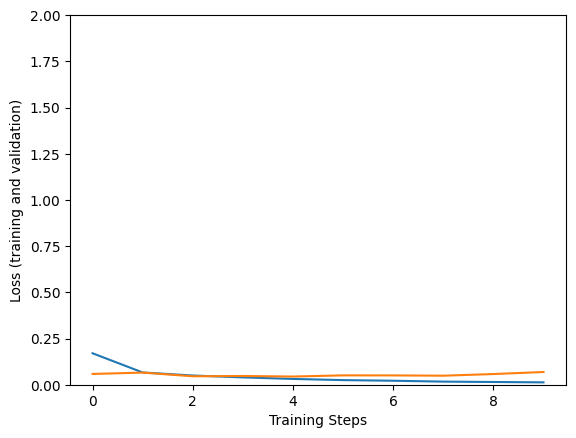

In [12]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


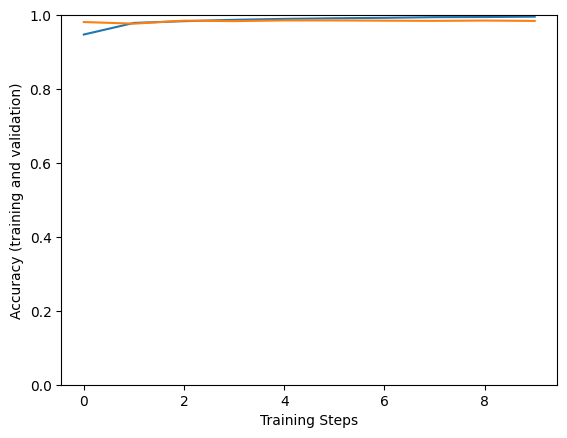

In [13]:
plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

Avaliando o Classificador:

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.0688 - accuracy: 0.9843 - 3s/epoch - 8ms/step
0.9843000173568726


# **Testando o classificador para um dos dados de Teste**

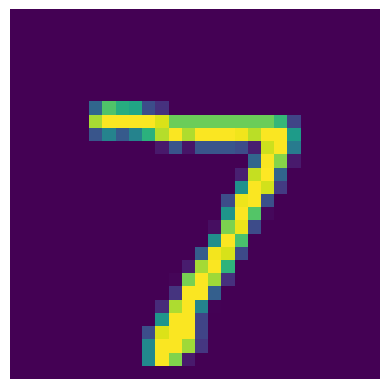

1/1 [==============================] - 0s 34ms/step
True label: 7
Predicted label: 7


In [22]:
classNames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

x,y = (test_images[0], test_labels[0])
plt.imshow(x)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(x, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: 7")
print("Predicted label: " + classNames[predicted_index])